# Сеть фитнес-центров

## Введение

Сеть фитнес-центров в рамках борьбы с оттоком клиентов поставила задачу проведения анализа и подготовку плана действий по удержанию клиентов, в частности:

- Прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- Проанализировать основные признаки, наиболее сильно влияющие на отток;
- Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - Выделить целевые группы клиентов;
    - Предложить меры по снижению оттока;
    - Определить другие особенности взаимодействия с клиентами.

## Загрузка данных

В рамках данного шага необходимо импортировать все библиотеки, которые понадобятся в работе и загрузить данные, предоставленные Заказчиком исследования

### Загрузка необходимых библиотек

In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
import numpy as np

### Загрузка данных

In [2]:
# Импортируем данные в переменную

data = pd.read_csv('/datasets/gym_churn.csv')

##  Исследовательский анализ данных (EDA)

В рамках данного раздела исследования необходимо:
- рассмотреть датасет
- Изучить отсутствующие признаки
- изучить средние значения
- изучить стандартные отклонения
- рассмотерть средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
- постройть столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
- Построить матрицу корреляций

### Рассмотрение датасета, отствующих признаков, средних значений и стандартных отклонений

In [3]:
# Получение первоначального представления о датасете через методы shape, head(), info(), describe()
display(data.shape)
print()
print()
display(data.head())
print()
print()
display(data.info())
print()
print()
display(data.describe())


(4000, 14)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   flo

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Вывод по подразделу:**

Датасет содержит 4 000 записей о клиентах без пропусков, разбитые на 14 признаков:

Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол; Разбит на значения 1 и 0 без уточнения значения конкретного числа. Среднее значение 0,51 свидетельствует о примерно равенстве представителей обоих полов среди клиентов. Стандартное отклонение не вызывает дополнительных вопросов
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр; Разбит на значения 1 и 0 без уточнения значения конкретного числа. Стандартное отклонение не вызывает дополнительных вопросов
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента); Разбит на значения 1 и 0 без уточнения значения конкретного числа. Стандартное отклонение не вызывает дополнительных вопросов
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента); Разбит на значения 1 и 0 без уточнения значения конкретного числа. Стандартное отклонение не вызывает дополнительных вопросов
- `Phone` — наличие контактного телефона; Разбит на значения 1 и 0 без уточнения значения конкретного числа. Стандартное отклонение не вызывает дополнительных вопросов
- `Age` — возраст; Средний и медианный возраст клиента совпадают - 29 лет. Стандартное отклонение не вызывает дополнительных вопросов
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах). Среднее значение - 3,72 месяца, медианное - 3 месяца. При этом на основании стандартного отлонения 3,75 можно сделать вывод, что данные по данному признаку имеют большую волатильность

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);  Среднее значение - 4,68 , медианное - 1. Большинство клиентов имеют действующий контракт длиной всего 1 месяц
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах); длительность текущего действующего абонемента (месяц, 6 месяцев, год);  Среднее значение - 4,32 месяца, медианное - 3 месяца. Большинство клиентов имеют контракт, который закончится в ближайшие 3 месяца. На основании стандартного отклонения можно сделать вывод, что данные по данному признаку волатильны
- `Group_visits` — факт посещения групповых занятий; Разбит на значения 1 и 0 без уточнения значения конкретного числа.
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента; В среднем клиенты посещают зал 1,87 раза в неделю, стандартное отклонение 0,97 позволяет сделать вывод, что большинство клиентов посещают зал 1-3 раза в неделю.
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц; средняя частота посещений в неделю за все время с начала действия абонемента; В среднем клиенты посещают зал 1,76 раза в неделю, что меньше чем средняя частота посещений в неделю за все время с начала действия абонемента
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон. Величина дана без указания единиц измерения. В среднем клиенты тратили в месяц 147 при среднем отклонении в 96,3
- `Churn` — факт оттока в текущем месяце.   Разбит на значения 1 и 0, где 1 означает уход клиента, а 0, что клиент остался. тандартное отклонение не вызывает дополнительных вопросов. 26,5 % предоставленных анкет принадлежат ушедшим клиентам

### Рассмотрение средних значений признаков с рабивкой на группы ушедших и оставшихся

In [4]:
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Вывод по подразделу:**

В соответствии со средними значениями показателей, среди ушедших клиентов:

- В 2 раза меньше тех, кто пришел по акции "приведи друга". Возможно, товарищ по спорту способствует продолжению занятий
- В 1,5 раза меньше тех, кто пришел через партнерскую программу. Вероятно, совместное посещение тренажерного зала способствует единению коллектива компании и продолжению занятий клиентами
- Ушедшие клиенты имели значительно меньшую продолжительность действующего контракта - 1,72 месяца против 5,74 и, что естественно, меньшее количество месяцев до его истечения
- Почти в 2 раза реже посещали групповые занятия. Судя по данному показателю, они способствуют сохранению клиентов
- Меньше тратили на дополнительные услуги 
- Меньший показатель продолжительности сотурдничества с момента первого обращения (меньше месяца). Многие уходят в течение 1-2 месяцев.
- Меньшее количество посещений, как в среднем (1,47 против 2,02), так и в последнем месяце (1,04 против 2,027)

### Построение столбчатых гистограмм и распределения с разбивкой на группы ушедших и оставшихся

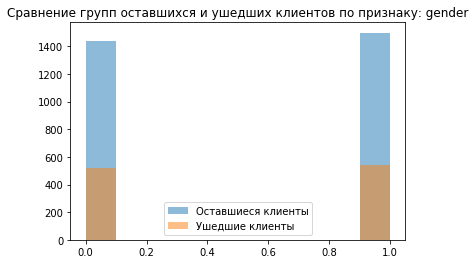

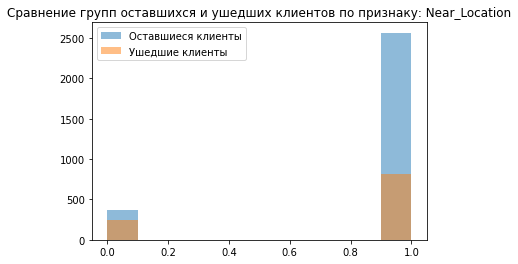

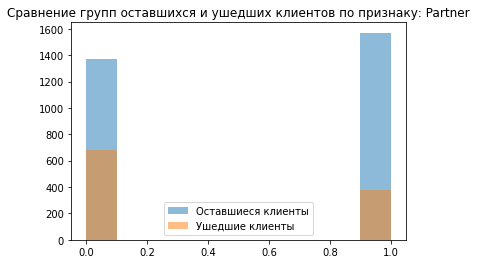

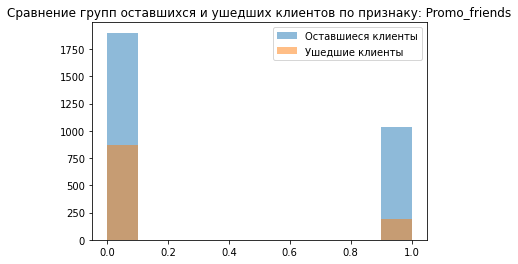

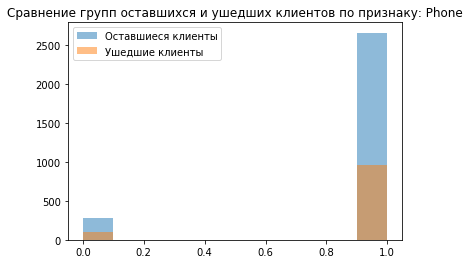

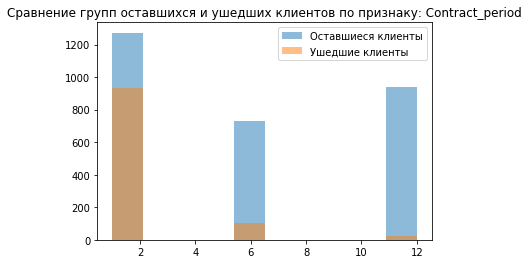

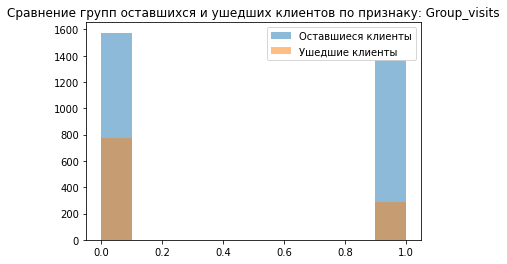

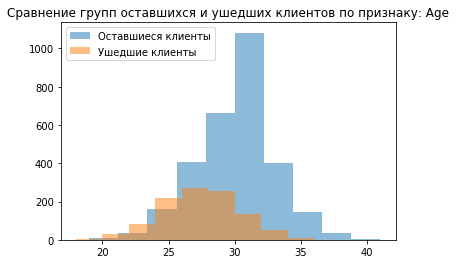

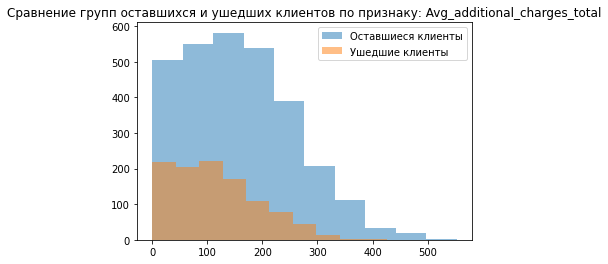

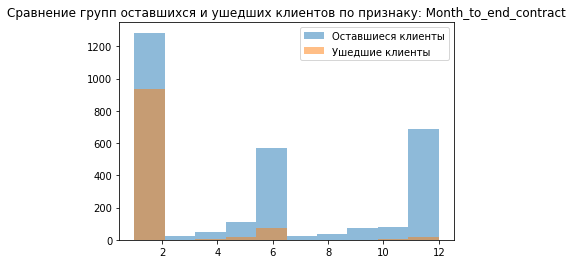

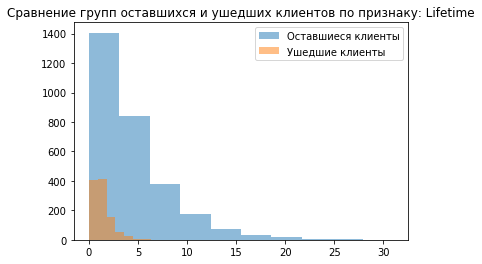

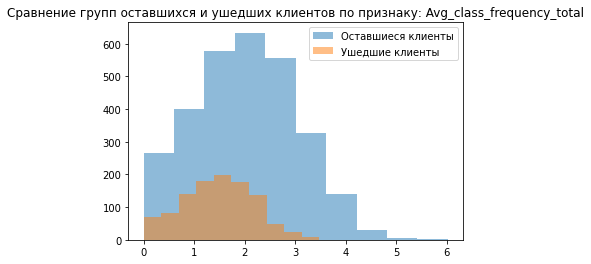

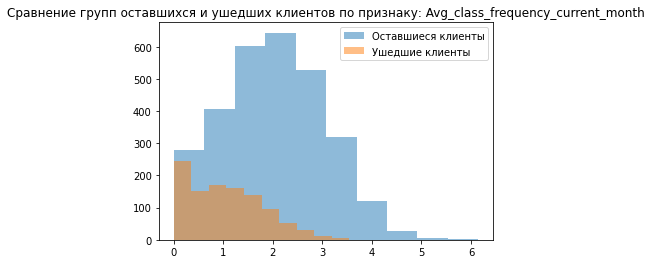

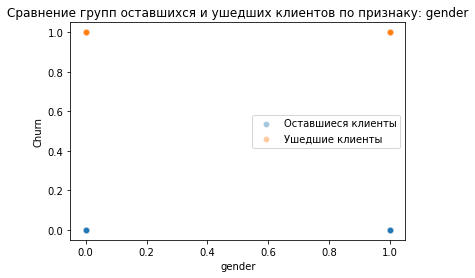

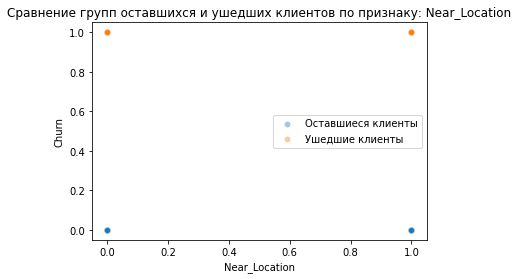

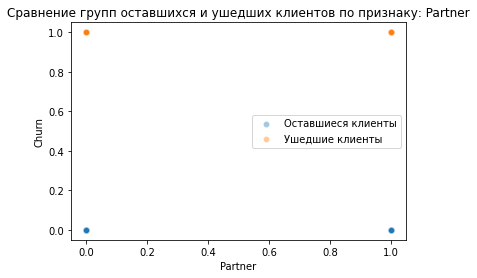

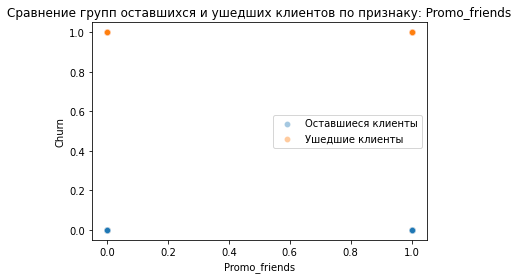

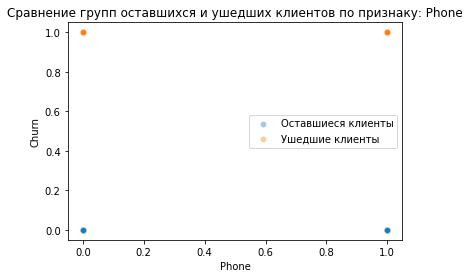

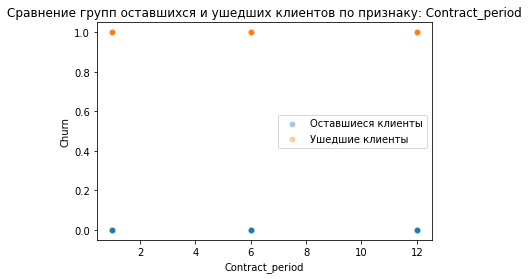

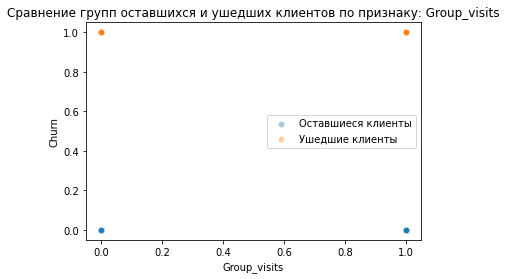

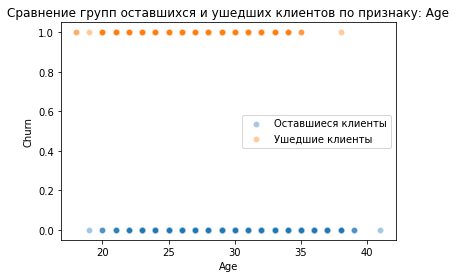

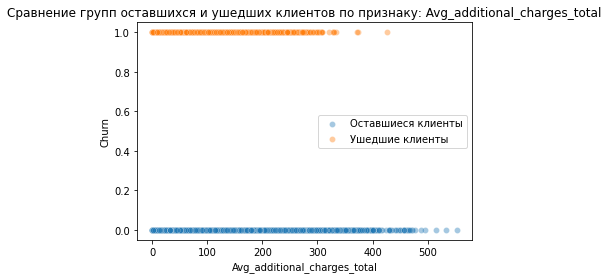

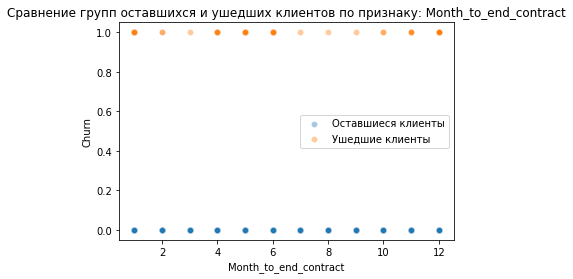

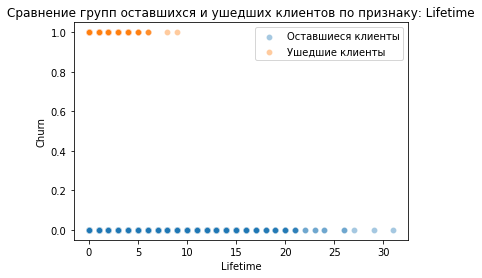

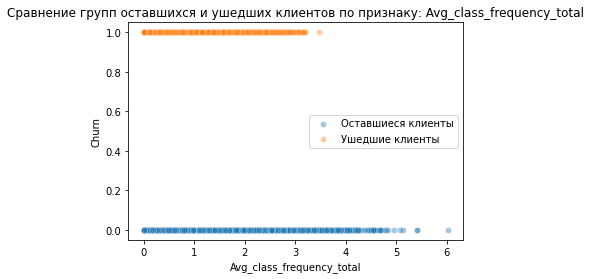

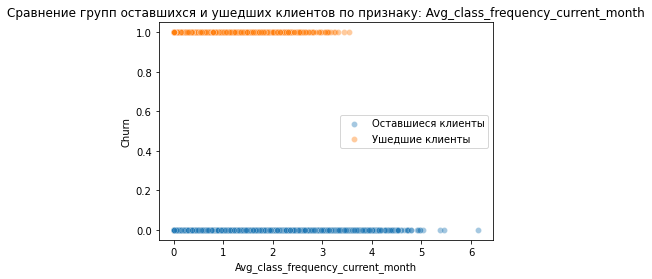

In [5]:
# Разобьем датасет на 2 в зависимости от группы ушел - не ушел
stay = data.query('Churn == 0')
leave = data.query('Churn == 1')

# Построение гистограмм
for col in data.drop('Churn', axis = 1).columns:
    plt.hist(stay[col],  alpha=0.5, label='Оставшиеся клиенты')
    plt.hist(leave[col],  alpha=0.5, label='Ушедшие клиенты')
    plt.legend(loc=0)
    plt.title('Сравнение групп оставшихся и ушедших клиентов по признаку: {}'.format(col))
    plt.show()
    
# Построение диаграмм рассеивания
for col in data.drop('Churn', axis = 1).columns:
    sns.scatterplot(x=stay[col], y=stay["Churn"],  label='Оставшиеся клиенты', alpha = 0.4, marker = "o")
    sns.scatterplot(x=leave[col], y=leave["Churn"], label='Ушедшие клиенты', alpha = 0.4, marker = "o") 
    plt.legend(loc=0)
    plt.title('Сравнение групп оставшихся и ушедших клиентов по признаку: {}'.format(col))
    plt.show()

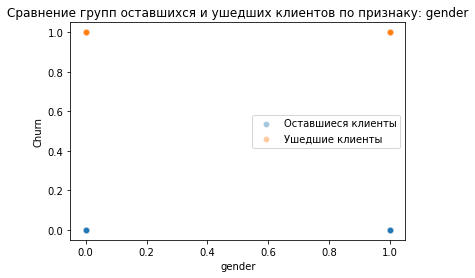

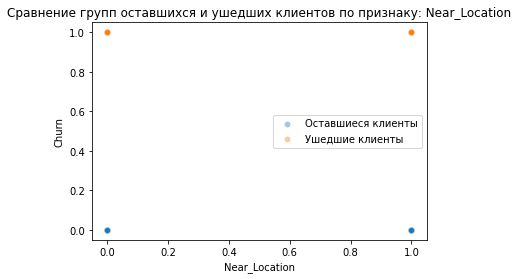

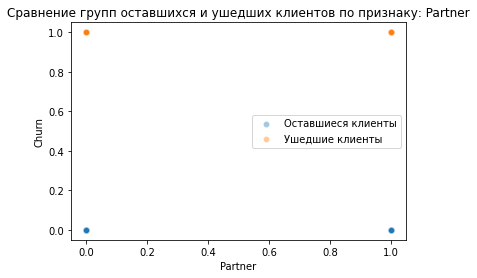

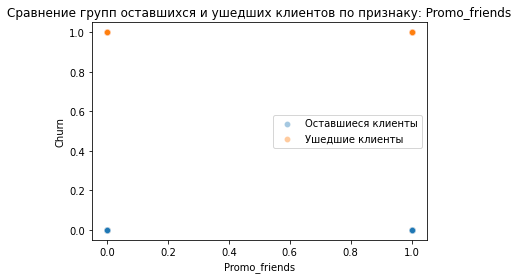

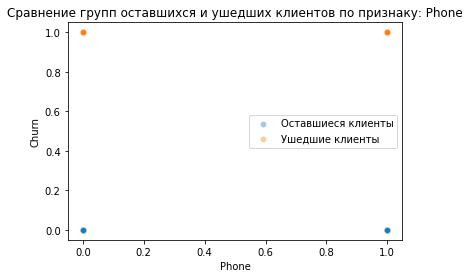

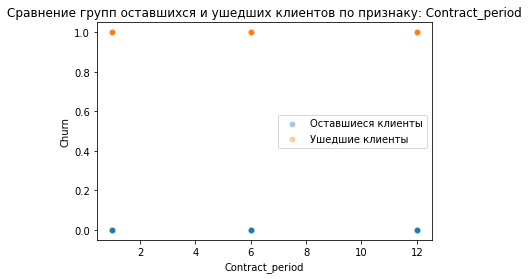

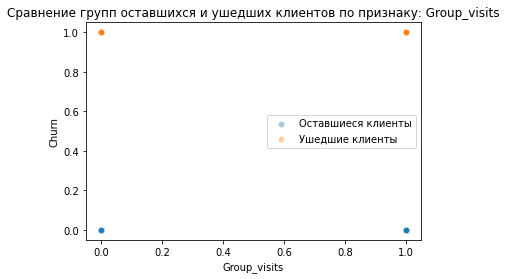

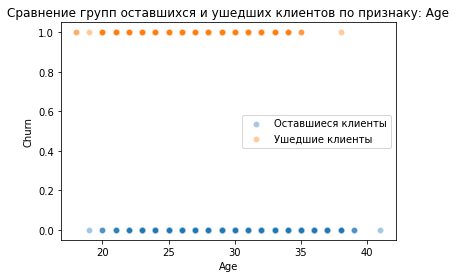

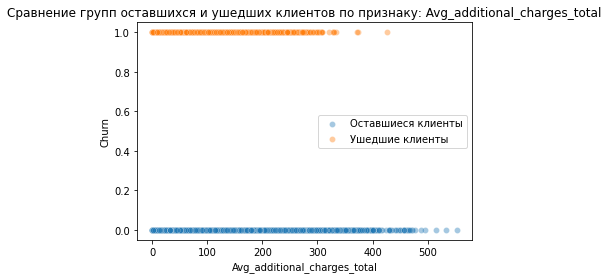

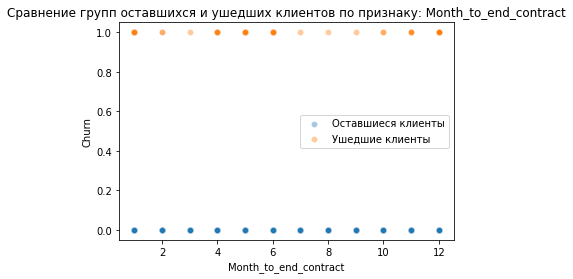

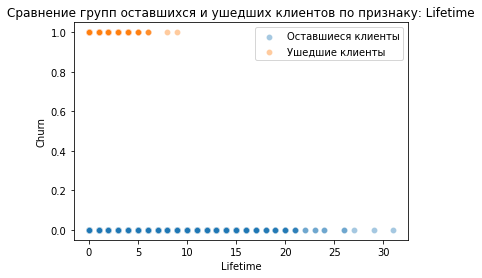

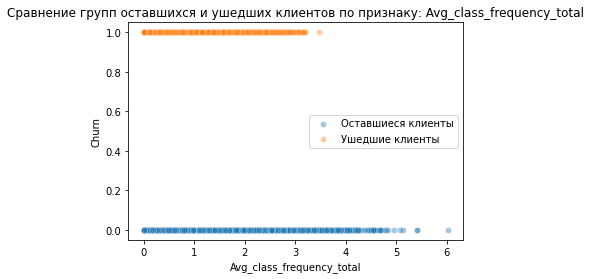

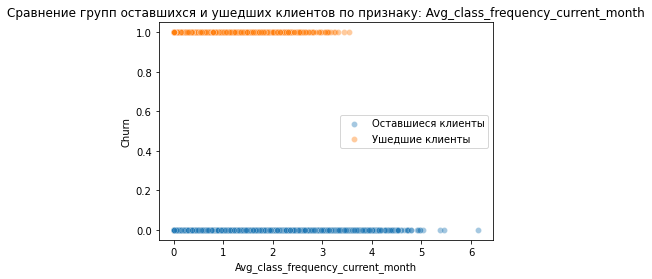

In [6]:
# Построение диаграмм рассеивания
for col in data.drop('Churn', axis = 1).columns:
    sns.scatterplot(x=stay[col], y=stay["Churn"],  label='Оставшиеся клиенты', alpha = 0.4, marker = "o")
    sns.scatterplot(x=leave[col], y=leave["Churn"], label='Ушедшие клиенты', alpha = 0.4, marker = "o") 
    plt.legend(loc=0)
    plt.title('Сравнение групп оставшихся и ушедших клиентов по признаку: {}'.format(col))
    plt.show()


**Вывод по подразделу:**

В соответсвии с диаграммами рассеивания, ушедшие клиенты в среднем:

- Моложе оставшихся
- Меньше тратили на дополнительные услуги
- Имели меньший срок до истечения контракта
- Имели меньшую продолжительность взаимодействия с клубом
- Реже посещали клуб

### Построение матрицы корреляции

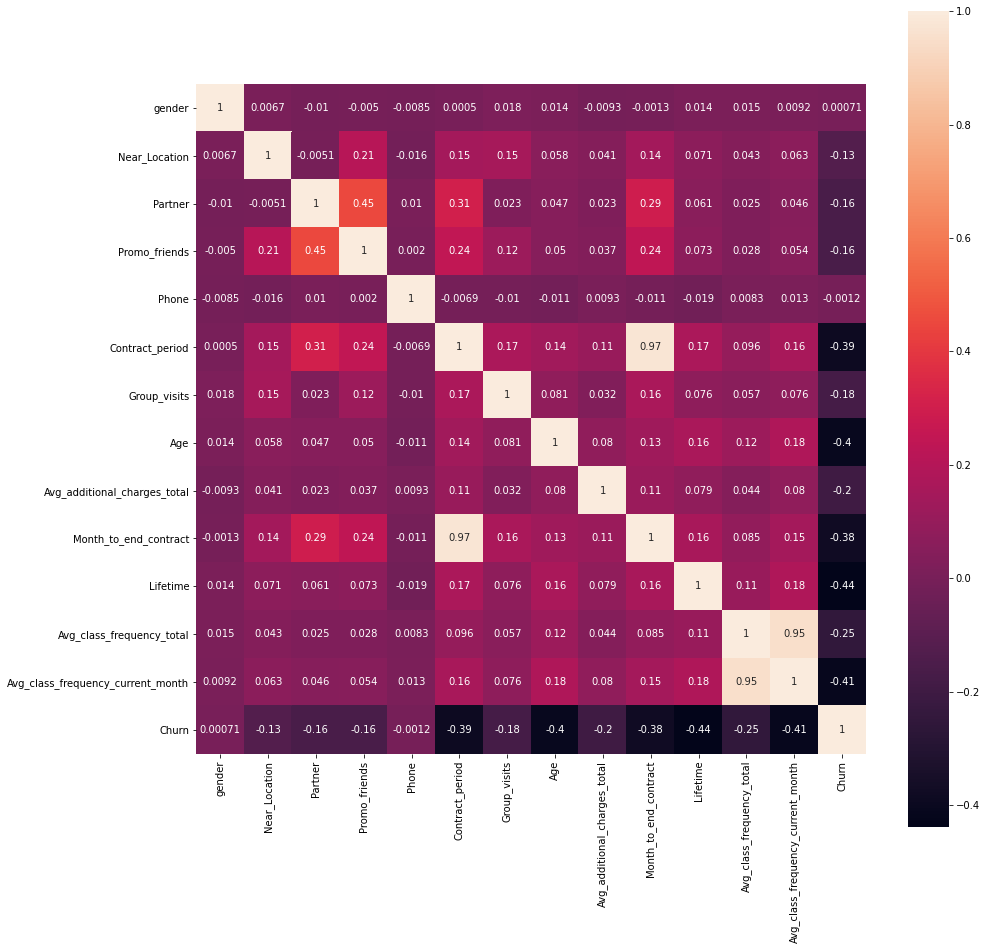

In [7]:
cm = data.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize= (15,15))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square = True) 
# корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

Были обнаружены 2 пары мультиколлениарных признаков:

1) Срок контракта - срок до истечения контракта
2) Общая средняя посещаемость - посещаемость за последний месяц

Принято решение не удалять данные признаки при дальнейшем анализе, т.к. они помогают проанализировать поведение ушедших клиентов в последний месяц до оттока и изучить ухудшение метрики срдених посещений для сохранившихся клиентов

**Вывод по подразделу:**

В соответсвии с матрицей корреляции, наибольшая взаимосвязь между признаками и показателем Churn (ушел - не ушел) у следующих признаков:

- Lifetime - время с момента первого обращения в фитнес-центр (в месяцах): -0.44
- Avg_class_frequency_current_month - средняя частота посещений в неделю за предыдущий месяц: -0.41
- Age - Возраст: -0.4
- Contract_period — длительность текущего действующего абонемента (месяц, 6 месяцев, год): -0.39
- Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах): -0.38

### Вывод по разделу:

**Датасет содержит 4 000 записей о клиентах без пропусков, разбитые на 14 признаков:**

Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол; Разбит на значения 1 и 0 без уточнения значения конкретного числа. Среднее значение 0,51 свидетельствует о примерно равенстве представителей обоих полов среди клиентов. Стандартное отклонение не вызывает дополнительных вопросов
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр; Разбит на значения 1 и 0 без уточнения значения конкретного числа. Стандартное отклонение не вызывает дополнительных вопросов
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента); Разбит на значения 1 и 0 без уточнения значения конкретного числа. Стандартное отклонение не вызывает дополнительных вопросов
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента); Разбит на значения 1 и 0 без уточнения значения конкретного числа. Стандартное отклонение не вызывает дополнительных вопросов
- `Phone` — наличие контактного телефона; Разбит на значения 1 и 0 без уточнения значения конкретного числа. Стандартное отклонение не вызывает дополнительных вопросов
- `Age` — возраст; Средний и медианный возраст клиента совпадают - 29 лет. Стандартное отклонение не вызывает дополнительных вопросов
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах). Среднее значение - 3,72 месяца, медианное - 3 месяца. При этом на основании стандартного отлонения 3,75 можно сделать вывод, что данные по данному признаку имеют большую волатильность

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);  Среднее значение - 4,68 , медианное - 1. Большинство клиентов имеют действующий контракт длиной всего 1 месяц
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах); длительность текущего действующего абонемента (месяц, 6 месяцев, год);  Среднее значение - 4,32 месяца, медианное - 3 месяца. Большинство клиентов имеют контракт, который закончится в ближайшие 3 месяца. На основании стандартного отклонения можно сделать вывод, что данные по данному признаку волатильны
- `Group_visits` — факт посещения групповых занятий; Разбит на значения 1 и 0 без уточнения значения конкретного числа.
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента; В среднем клиенты посещают зал 1,87 раза в неделю, стандартное отклонение 0,97 позволяет сделать вывод, что большинство клиентов посещают зал 1-3 раза в неделю.
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц; средняя частота посещений в неделю за все время с начала действия абонемента; В среднем клиенты посещают зал 1,76 раза в неделю, что меньше чем средняя частота посещений в неделю за все время с начала действия абонемента
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон. Величина дана без указания единиц измерения. В среднем клиенты тратили в месяц 147 при среднем отклонении в 96,3
- `Churn` — факт оттока в текущем месяце.   Разбит на значения 1 и 0, где 1 означает уход клиента, а 0, что клиент остался. тандартное отклонение не вызывает дополнительных вопросов. 26,5 

**В соответствии со средними значениями показателей, среди ушедших клиентов:**

- В 2 раза меньше тех, кто пришел по акции "приведи друга". Возможно, товарищ по спорту способствует продолжению занятий
- В 1,5 раза меньше тех, кто пришел через партнерскую программу. Вероятно, совместное посещение тренажерного зала способствует единению коллектива компании и продолжению занятий клиентами
- Ушедшие клиенты имели значительно меньшую продолжительность действующего контракта - 1,72 месяца против 5,74 и, что естественно, меньшее количество месяцев до его истечения
- Почти в 2 раза реже посещали групповые занятия. Судя по данному показателю, они способствуют сохранению клиентов
- Меньше тратили на дополнительные услуги 
- Меньший показатель продолжительности сотурдничества с момента первого обращения (меньше месяца). Многие уходят в течение 1-2 месяцев.
- Меньшее количество посещений, как в среднем (1,47 против 2,02), так и в последнем месяце (1,04 против 2,027)

**В соответсвии с матрицей корреляции, наибольшая взаимосвязь между признаками и показателем Churn (ушел - не ушел) у следующих признаков:**

- Lifetime - время с момента первого обращения в фитнес-центр (в месяцах): -0.44
- Avg_class_frequency_current_month - средняя частота посещений в неделю за предыдущий месяц: -0.41
- Age - Возраст: -0.4
- Contract_period — длительность текущего действующего абонемента (месяц, 6 месяцев, год): -0.39
- Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах): -0.38

## Построение модели прогнозирования оттока клиентов

Целью данного раздела является построение модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. Намеченные шаги:

- Разбивка данных на обучающую и валидационную выборку функцией train_test_split().
- Обучение модели на train-выборке двумя способами:
    - логистической регрессией,
    - случайным лесом.
- Оценка метриками accuracy, precision и recall для обеих моделей на валидационной выборке. 
- Сравнение по ним моделей
- Выбор модели на основании метрик

### Разбивка данных на обучающую и валидационную выборку

In [8]:
# разделение данных на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

### Обучение, оценка, сравнение и выбор модели

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


Значимость признаков для модели
                              feature     coeff  coeff_abs
12  Avg_class_frequency_current_month -4.213410   4.213410
10                           Lifetime -3.581257   3.581257
11          Avg_class_frequency_total  3.111962   3.111962
7                                 Age -1.167067   1.167067
5                     Contract_period -0.703639   0.703639
9               Month_to_end_contract -0.631972   0.631972
8        Avg_additional_charges_total -0.571299   0.571299
6                        Group_visits -0.401414   0.401414
3                       Promo_friends -0.143413   0.143413
2                             Partner -0.066479   0.066479
1                       Near_Location -0.052529   0.052529
4                               P

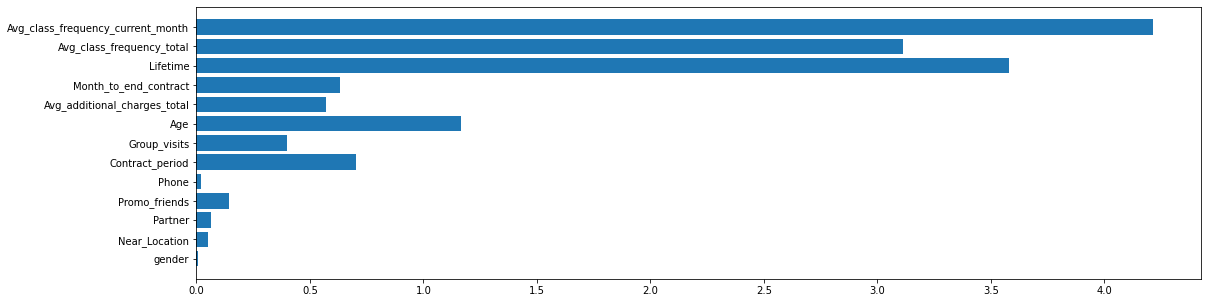

In [9]:
# определим функцию, которая будет выводить  метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    print()


# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]# Ваш код здесь
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)
print()

# Отображение значимости признаков
print('Значимость признаков для модели')

lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)

# Построение горизонтальной столбчатой диаграммы
features = pd.DataFrame({'feature':X_train.columns, 'coeff':lr_model.coef_[0]})
features['coeff_abs'] = [abs(i) for i in features['coeff']]
print(features.sort_values('coeff_abs', ascending= False))    
f, ax = plt.subplots(figsize=(18,5))
plt.barh(features['feature'], features['coeff_abs'] )
plt.show()



### Вывод по разделу

На основании полученных метрик для методов логистической регрессии и случайного леса можно сделать вывод, что обе модели имеют примерно равную степень точности, но метод логистической регрессии показал чуть лучшие результаты в показателях метрик Precision и Recall

## Кластеризация клиентов

В ходе разработки данного раздела исследования необходимо произвести кластеризацию клиентов. Планируемые шаги:

- Стандартизация данных.
- Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и построение дендрограммы.
- Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов. 
- Рассмотрение средних значений признаков для кластеров. 
- Построение распределения признаков для кластеров. 
- Расчет для каждого полученного кластера доли оттока (методом groupby()). 
- Выявление кластеров склонных к оттоку

### Стандартизация данных, построение матрицы расстояний и дендрограммы 

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

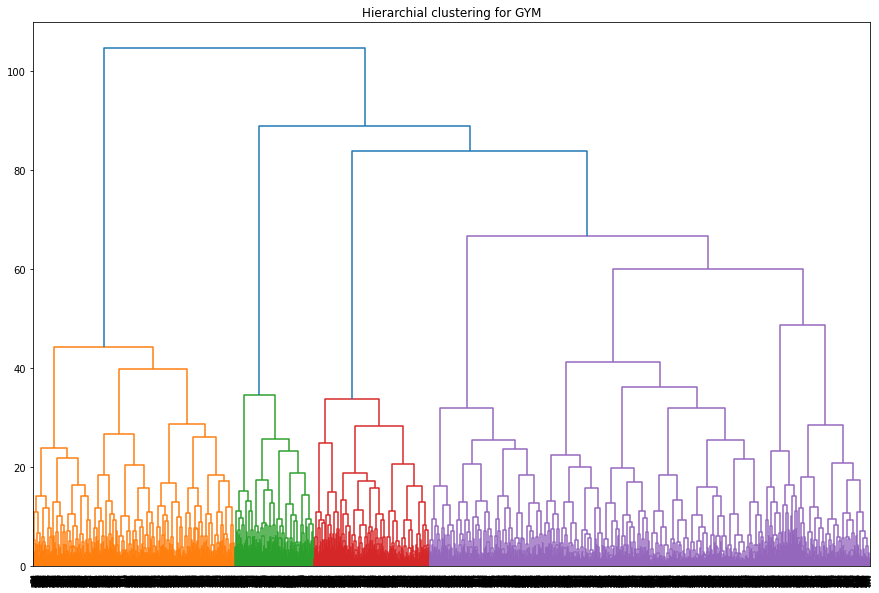

In [10]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Построение матрицы расстояний
linked = linkage(X_sc, method = 'ward') 
display(linked)

# Построение дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

**Вывод по подразделу:**

В соответсвии с построенной дендрограммой, логичным будет выделение 4 кластеров

### Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов.

In [11]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5 в соответствии с заданием
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

# сохраняем метки кластера в поле датасета
data['cluster_km'] = labels

### Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов.

Среднеарифметические показатели признаков в разбивке по кластерам


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Количество посетителей в разбивке по кластерам


cluster_km
0    1010
1     385
2     505
3    1262
4     838
Name: Churn, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

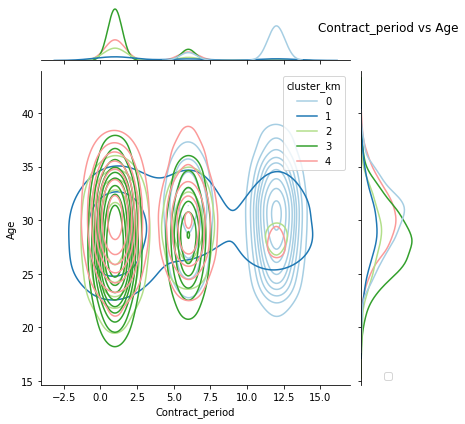

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

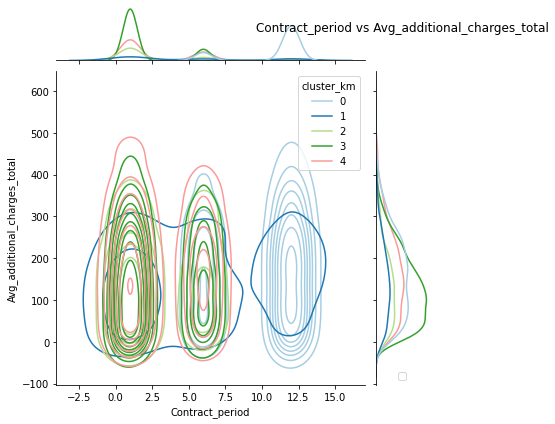

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

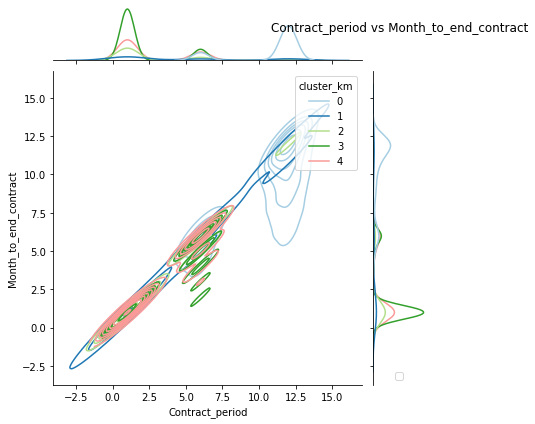

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

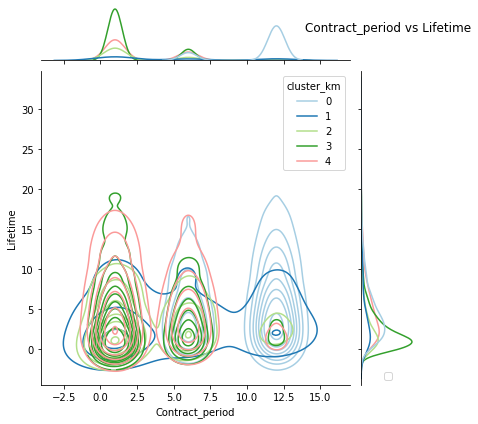

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

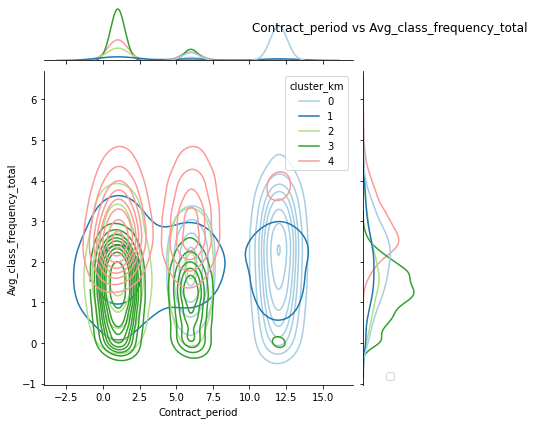

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

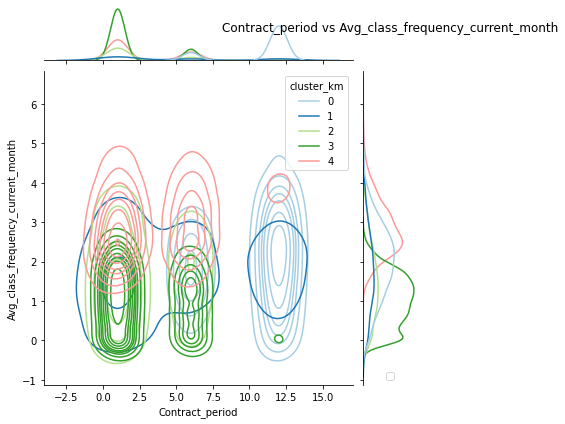

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

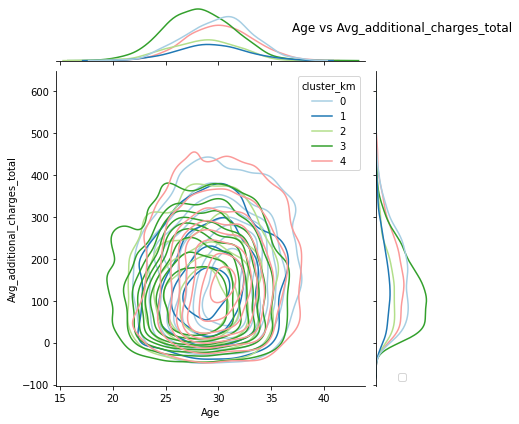

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

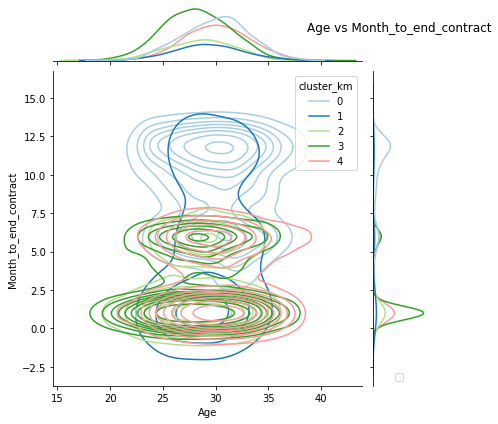

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

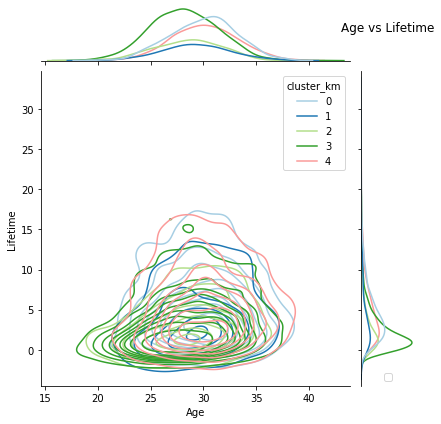

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

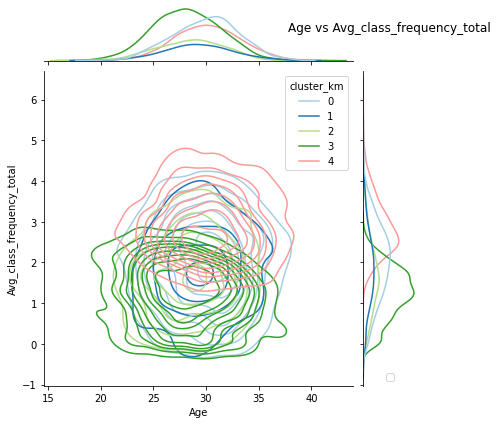

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

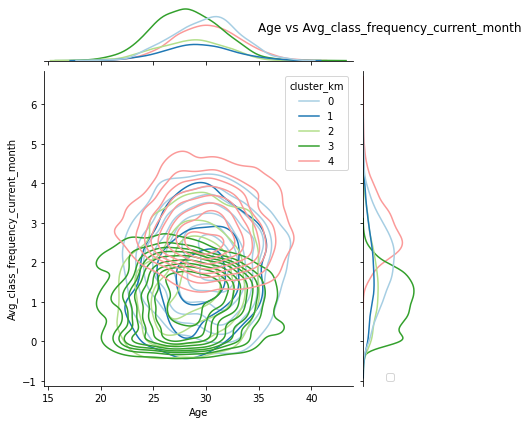

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

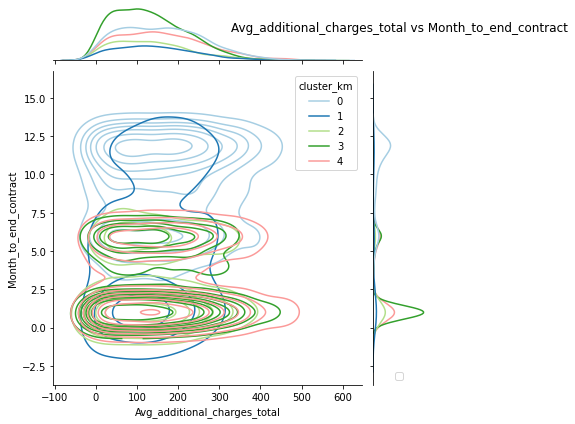

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

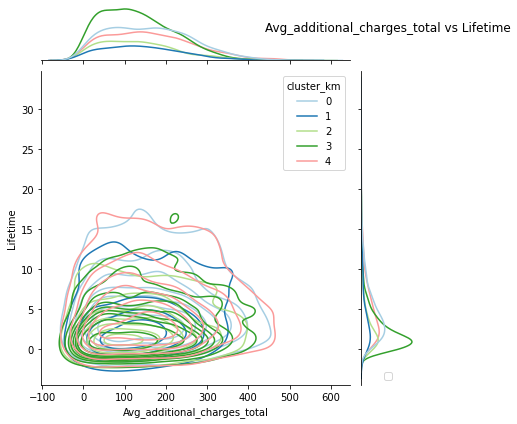

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

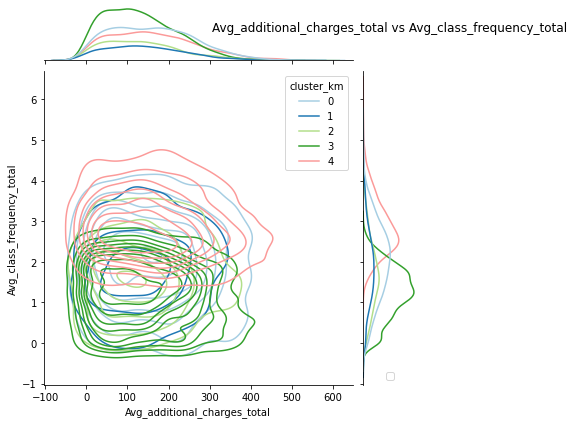

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

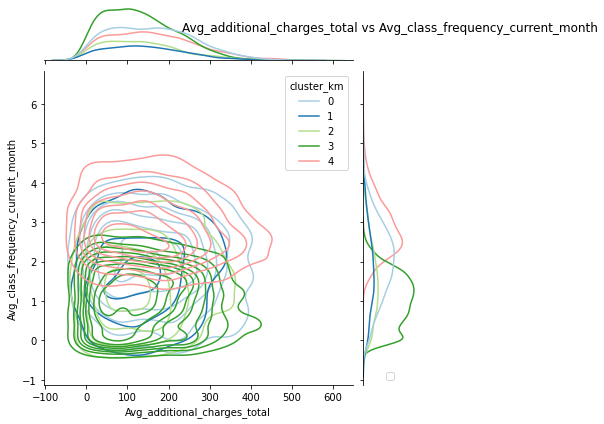

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

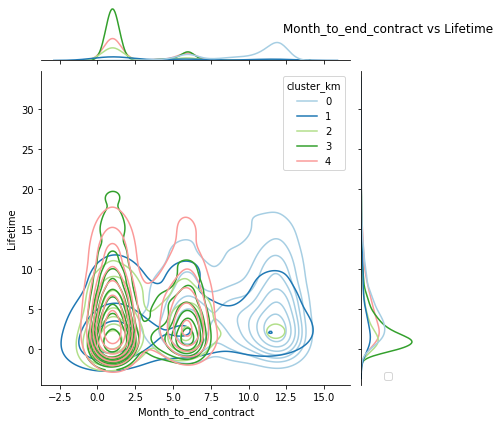

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

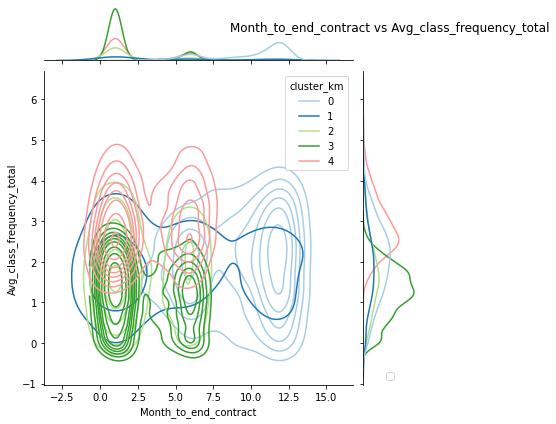

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

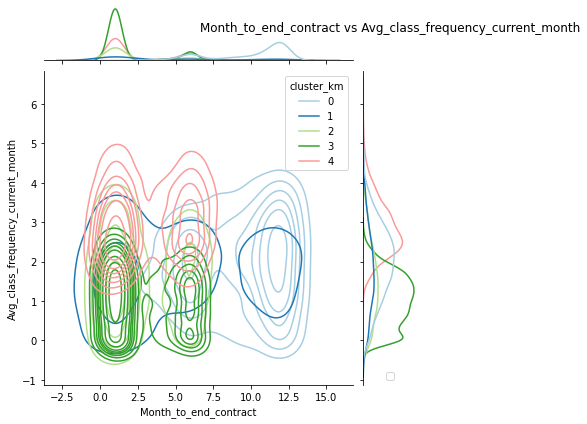

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

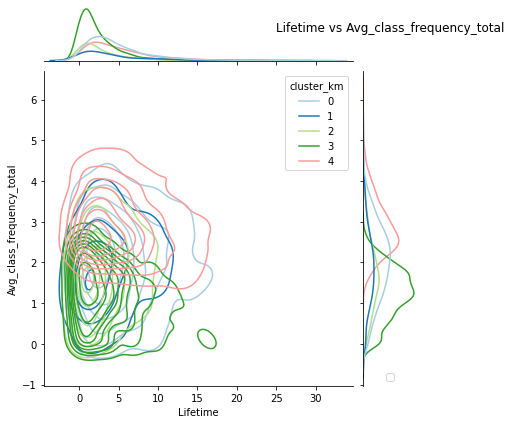

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

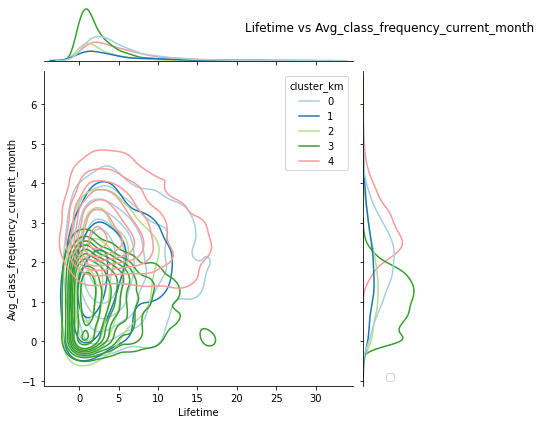

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


<Figure size 360x360 with 0 Axes>

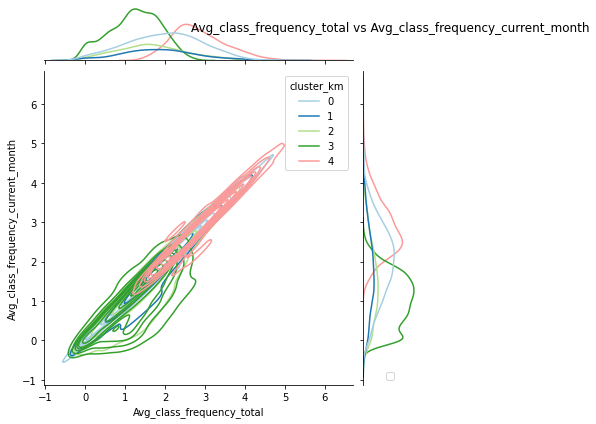

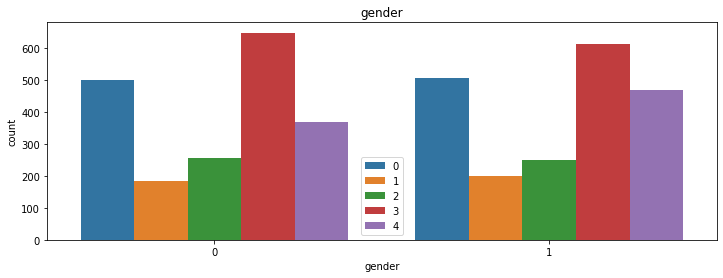

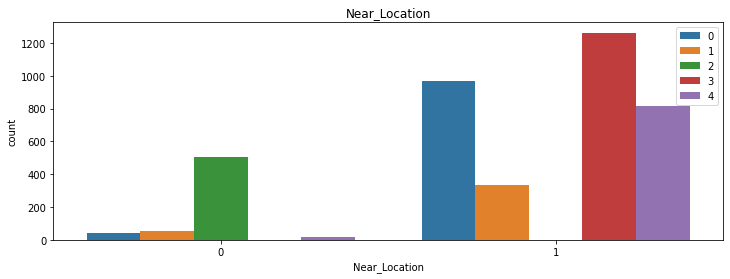

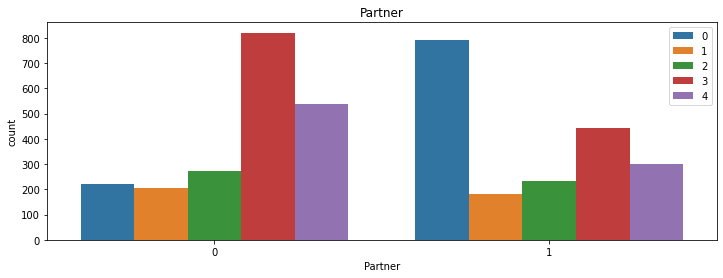

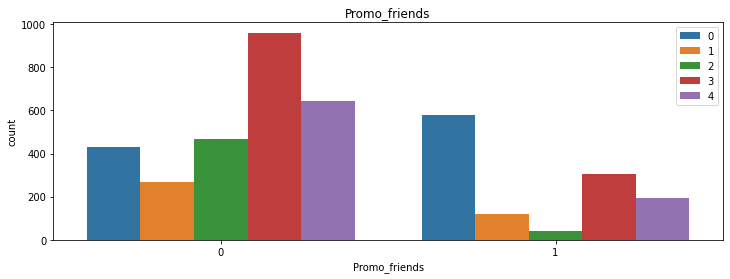

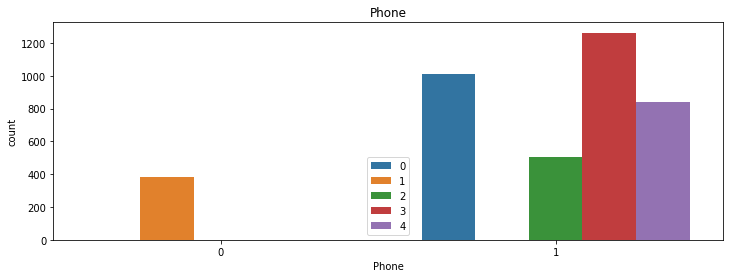

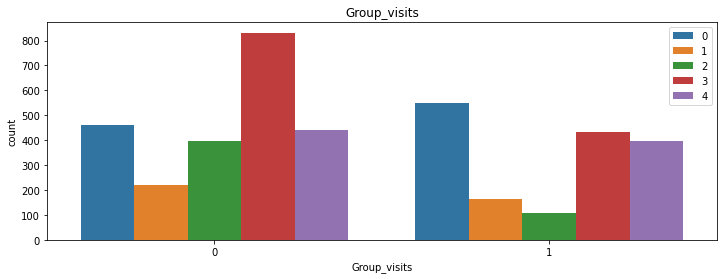

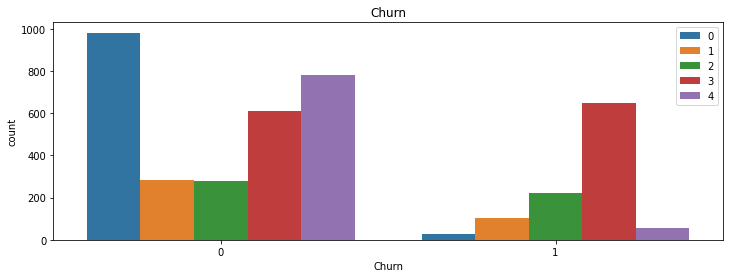

Среднеарифметические показатели оттока в разбивке по кластерам


cluster_km
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

In [23]:
# выводим статистику по средним значениям наших признаков по кластеру
print('Среднеарифметические показатели признаков в разбивке по кластерам')
display(data.groupby('cluster_km').mean())
print('Количество посетителей в разбивке по кластерам')
display(data.groupby('cluster_km')['Churn'].count())
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.jointplot(
        df[x_name], data[y_name], hue=df[cluster_name], palette='Paired', kind="kde"
    )
    plt.title('{} vs {}'.format(x_name, y_name), loc = 'center', pad = 40)
    sns.move_legend(g.ax_joint, "lower center")
    plt.show()

# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(data.drop(['gender','Partner', 'Near_Location', 'Promo_friends', 'Phone','Group_visits', 'Churn','cluster_km'], axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(data, pair[0], pair[1], 'cluster_km')
    
categorical_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone','Group_visits', 'Churn' ]

for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=data[column], hue="cluster_km", data=data)
    plt.title(column)
    plt.legend()
    plt.show()    
    
print('Среднеарифметические показатели оттока в разбивке по кластерам')    
display(data.groupby('cluster_km')['Churn'].mean())

# Уберем информационные преудпреждения
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    

### Выводы по разделу:

Пользователи Кластера №0:
- Чаще приходят по партнерской программе или по акции "приведи друга"
- Имеют наибольшую продолжительность текущего контракта (10,9 месяцев)
- Чаще других посещают групповые занятия
- Часто пользуются дополнительными платными услугами
- Имеют наибольшую остаточную продолжительность текущего контракта (10 месяцев)
- Имеют высокий показатель Lifetime
- **Имеют низкий показатель оттока (2,7%). Можно считать посетителей данного кластера лояльными**

Пользователи Кластера №1:
- Не оставили свой контактный номер телефона
- **Имеют средний показатель оттока (26%)**

Пользователи Кластера №2:
- Полностью принадлежат к географическому признаку Near_Location 0 
- реже остальных приходят по партнерской программе или по акции "приведи друга"
- **Имеют высокий показатель оттока (44,4%). Посетители данного кластера склонны к оттоку**

Пользователи Кластера №3:
- Полностью принадлежат к географическому признаку Near_Location 1
- Имеют наименьшую продолжительность текущего контракта (1,9 месяцев)
- Имеют наименьшую остаточную продолжительность текущего контракта (1,9 месяцев)
- Имеют самый низкий показатель Lifetime
- Имеют наименьшую среднюю частоту занятий в среднем и за прошедший месяц
- **Имеют высокий показатель оттока (51,1%). Посетители данного кластера склонны к оттоку**

Пользователи Кластера №4:
- Чаще принадлежат к полу с признаком 1 (56%)
- Часто посещают групповые занятия
- Больше всех тратят на дополнительные платные услуги
- Имеют наивысший показатель Lifetime
- Имеют наибольшую среднюю частоту занятий в среднем и за прошедший месяц
- **Имеют низкий показатель оттока (6,8%). Можно считать посетителей данного кластера лояльными**

## Выводы и рекомендации Клиенту

В соответсвии с проведенным исследованием Клиенту могут быть даны следующие рекомендации:

1) Продолжить развитие партнерских программ и акции "приведи друга", т.к. посетители самого лояльного кластера (0) чаще всего приходят по таким программам и акциям. При этом такие посетители чаще склонны к пользованию дополнительными платными услугами и имеют самый продолжительный lifetime 

2) Рассмотреть возможность обновления прейскуранта или добавления программ по рассрочке платежей, т.к. часто заключаются контракты низкой продолжительности, а такие клиенты более склонны к оттоку. Заключение более продолжительных контрактов на выгодных для посетителей условиях позволят сократить отток

3) Разработать программу поощрения для клиентов, которые имеют высокую частоту посещения, т.к. посетители, которые часто посещают клуб, например, кластер № 4, реже склонны к оттоку и часто пользуются дополнительными платными услугами.

4) Рассмотреть программу групповых занятий, выявить самые популярные и постараться улучшить их. Провести опрос посетителей на предмет интересующих их направлений групповых занятий. Ввести программу поощрения за посещения групповых занятий, т.к клиенты Кластера 0, которые являются лояльными, реже склонны к оттоку

Самих посетителей в разбивке по кластерам можно охарактеризовать следующим образом:

Кластер 0 - Посетители, пришедшие по партнерским программам или акции "приведи друга". Склонны к тратам на дополнительные услуги. Часто посещают групповые занятия, имеют большой срок контракта. На втором месте по численности. Не склонны к оттоку.

Кластер 1 - Не выявлены характерные признаки для данного кластера. Имеют средние показатели оттока

Кластер 2 - Полностью принадлежат к географическому признаку Near_Location 0, реже остальных приходят по партнерской программе или по акции "приведи друга". Склонны к оттоку.

Кластер 3 - Имеют низкий срок продолжительности контракта. Самый склонный к оттоку класс. При этом является самым многочисленным.

Кластер 4 - Заядлые спортсмены. Имеют наивысшую частоту посещений. На третьем месте по численности. Не склонны к оттоку.

# Спасибо за внимание!